#  Deep Learning for Fashion  CLASSIFICATION

In [1]:
# Import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [2]:
# Dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

### VISUALIZATION OF THE DATASET  

In [3]:
display(fashion_train_df.head())
print(fashion_train_df.shape)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(60000, 785)


In [4]:
# Let's view the last elements in the training dataset
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Create training and testing arrays
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [7]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

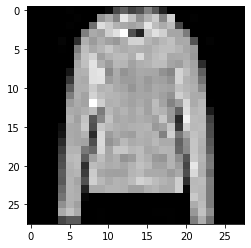

In [8]:
# View images
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image
plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

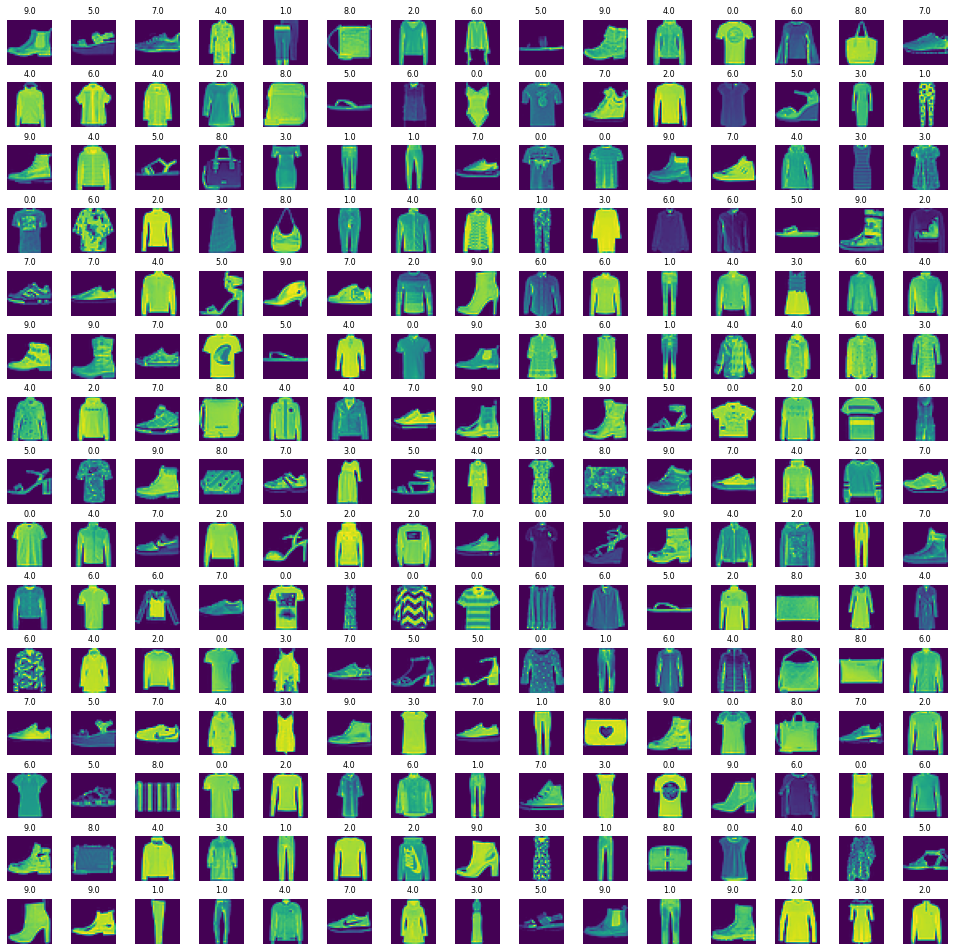

In [9]:
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

# flaten the 15 x 15 matrix into 225 array
axes = axes.ravel() 
n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(training[index, 1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot        

###  TRAINING THE MODEL

In [10]:
a = training[:, 1:]/255
a.shape

(60000, 784)

In [39]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((48000, 784), (48000,), (10000, 784), (10000,))

In [41]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))
X_train.shape, X_test.shape, X_validate.shape

((48000, 28, 28, 1), (10000, 28, 28, 1), (12000, 28, 28, 1))

In [42]:
import keras # open source Neural network library make our life much easier
# y_test = keras.utils.to_categorical(y_test, 10)
# y_test.shape

In [48]:
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [56]:
cnn_model = Sequential()
# Try 32 fliters first then 64
cnn_model.add(Conv2D(32,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))
# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Flatten()) 
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [57]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [58]:
epochs = 50
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 1s 6ms/step - loss: 1.8134 - accuracy: 0.3015 - val_loss: 1.1688 - val_accuracy: 0.6619
Epoch 2/50
94/94 [==============================] - 0s 5ms/step - loss: 1.1040 - accuracy: 0.6115 - val_loss: 0.7450 - val_accuracy: 0.7368
Epoch 3/50
94/94 [==============================] - 0s 5ms/step - loss: 0.8479 - accuracy: 0.6960 - val_loss: 0.6305 - val_accuracy: 0.7662
Epoch 4/50
94/94 [==============================] - 0s 5ms/step - loss: 0.7470 - accuracy: 0.7299 - val_loss: 0.5832 - val_accuracy: 0.7801
Epoch 5/50
94/94 [==============================] - 0s 5ms/step - loss: 0.6953 - accuracy: 0.7495 - val_loss: 0.5501 - val_accuracy: 0.7968
Epoch 6/50
94/94 [==============================] - 0s 5ms/step - loss: 0.6569 - accuracy: 0.7606 - val_loss: 0.5212 - val_accuracy: 0.8022
Epoch 7/50
94/94 [==============================] - 0s 5ms/step - loss: 0.6356 - accuracy: 0.7675 - val_loss: 0.5076 - val_accuracy: 0.8059
Epoch 8/50
94/94 [==

### EVALUATING THE MODEL

In [33]:
X_test.shape, y_test.shape

((10000, 28, 28, 1), (10000,))

In [34]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 0s 2ms/step - loss: 0.3706 - accuracy: 0.8659
Test Accuracy : 0.866


In [21]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


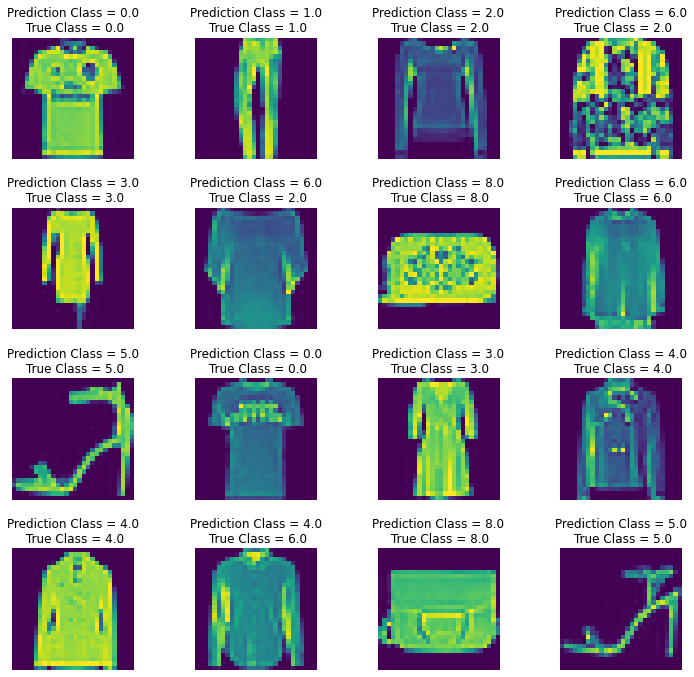

In [25]:
L = 4
W = 4
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

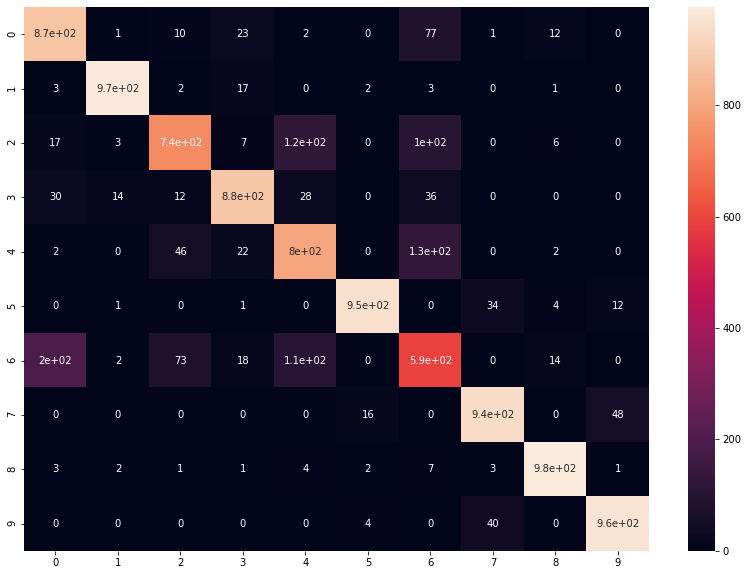

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [27]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.87      0.82      1000
     Class 1       0.98      0.97      0.97      1000
     Class 2       0.84      0.74      0.79      1000
     Class 3       0.91      0.88      0.89      1000
     Class 4       0.75      0.80      0.78      1000
     Class 5       0.98      0.95      0.96      1000
     Class 6       0.63      0.59      0.61      1000
     Class 7       0.92      0.94      0.93      1000
     Class 8       0.96      0.98      0.97      1000
     Class 9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

